In [1]:
import pandas as pd
import matplotlib.pyplot as plt
FIGSIZE = (14, 8)

In [2]:
wealth_raw = pd.read_csv('..//data//FORMUE7.csv', encoding='latin-1',sep=';', header=None)

def clean_age_group(x):
    res = x.split(' år')
    if res[-1] == ' og derover':
        return res[0] + ' <'
    else:
        return res[0]

In [3]:
wealth_raw = wealth_raw.drop([0, 1], axis=1)
wealth_raw.columns = ['age_group_raw', 'men_and_women', 'men', 'women']
wealth_raw['age_group'] = wealth_raw['age_group_raw'].apply(clean_age_group)

In [4]:
wealth_raw

,age_group_raw,men_and_women,men,women,age_group
0,0-17 år,15984,16553,15386,0-17
1,18-29 år,126894,133470,120043,18-29
2,30-39 år,471031,527769,413496,30-39
3,40-49 år,1069835,1207758,931691,40-49
4,50-59 år,1751435,2006013,1495213,50-59
5,60-69 år,2450994,2877881,2038397,60-69
6,70-79 år,2227074,2863414,1651452,70-79
7,80 år og derover,1616782,2148948,1277559,80 <


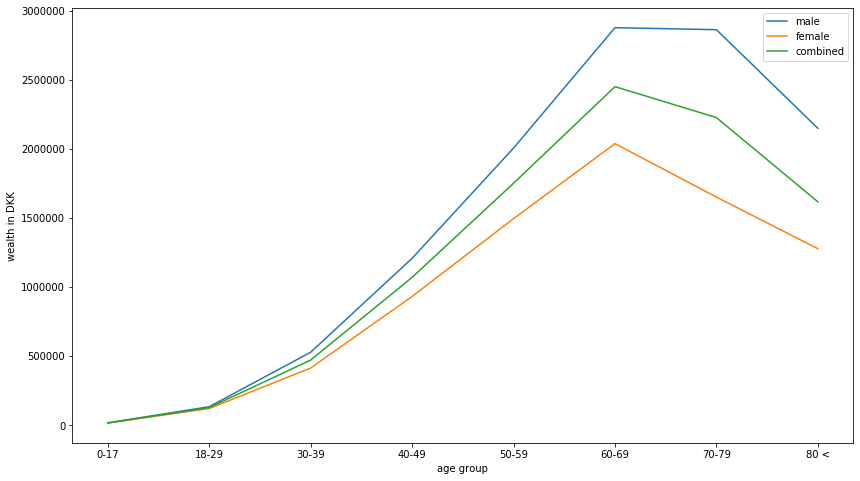

In [5]:
f, ax = plt.subplots(1,1, figsize = FIGSIZE)
ax.plot(wealth_raw['age_group'], wealth_raw['men'], label='male')
ax.plot(wealth_raw['age_group'], wealth_raw['women'], label='female')
ax.plot(wealth_raw['age_group'], wealth_raw['men_and_women'], label='combined')
ax.set_ylabel('wealth in DKK')
ax.set_xlabel('age group')
ax.legend()
f.savefig('../figures/wealth_by_age_group_empirical.png')

In [6]:
wealth_raw.to_pickle('..//data//wealth_by_age_group_emprical.pkl')